In [743]:
import matplotlib.pyplot as plt
import streamlit as st
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

### DATA PREPROCESSING

In [744]:
import pandas as pd

df = pd.read_csv('BC.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [745]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [746]:
df.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [747]:
duplicate = df.duplicated().sum()
print(f"Jumlah data yang duplikat: {duplicate}")

Jumlah data yang duplikat: 0


In [748]:
null_values = df.isnull().sum()
print("Jumlah data null: \n", null_values)

Jumlah data null: 
 id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [749]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

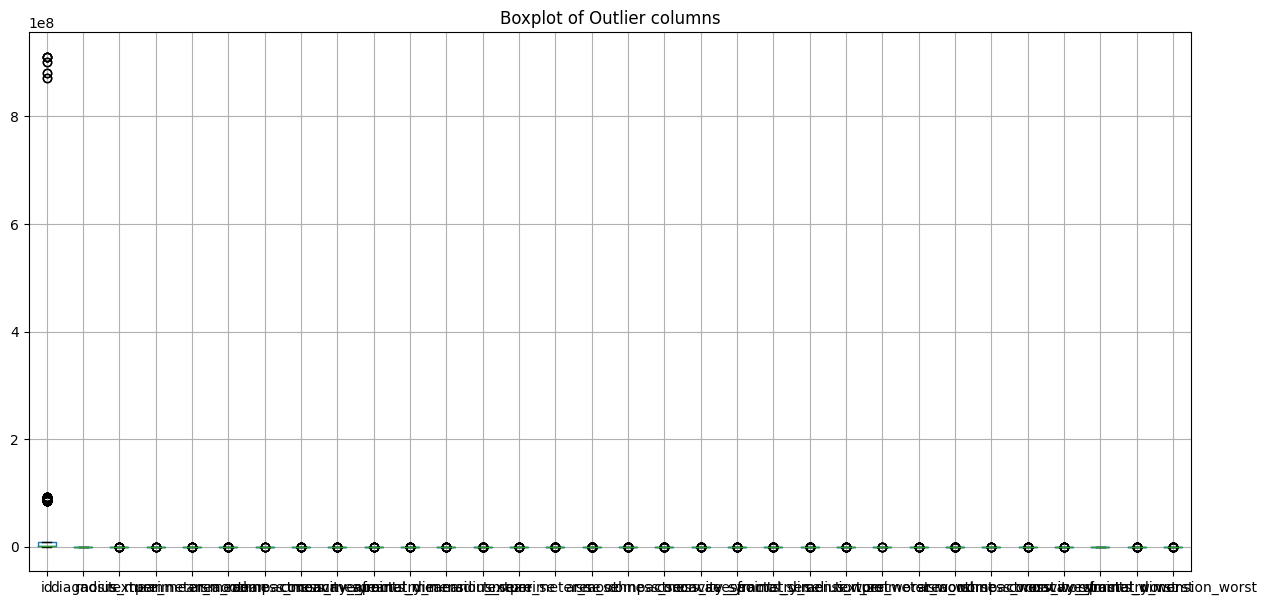

In [750]:
df.boxplot(figsize=(15,7))
plt.title('Boxplot of Outlier columns')
plt.show()

### DISTRIBUSI DATA

C:\Users\ridho\AppData\Local\Temp\ipykernel_19744\2766604171.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='diagnosis', palette='Set2')


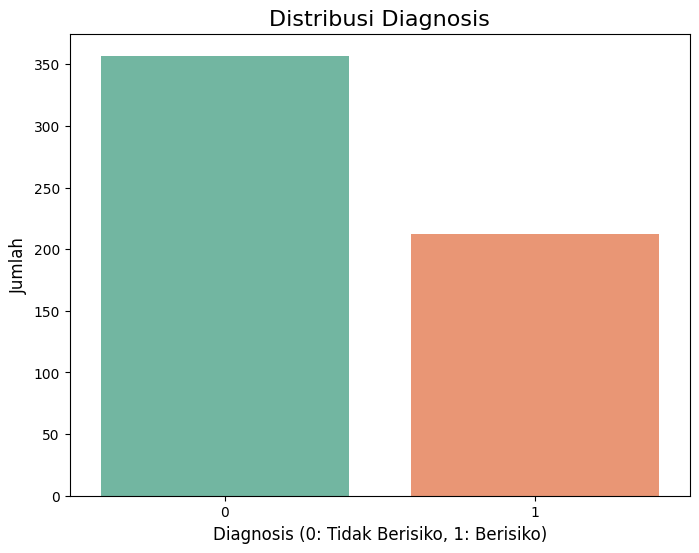

Distribusi Diagnosis:

diagnosis
0    357
1    212
Name: count, dtype: int64


In [751]:
# Distribusi diagnosis
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='diagnosis', palette='Set2')
plt.title('Distribusi Diagnosis', fontsize=16)
plt.xlabel('Diagnosis (0: Tidak Berisiko, 1: Berisiko)', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.show()

# Informasi distribusi dalam bentuk tabel
distribution_table = df['diagnosis'].value_counts()
print("Distribusi Diagnosis:\n")
print(distribution_table)


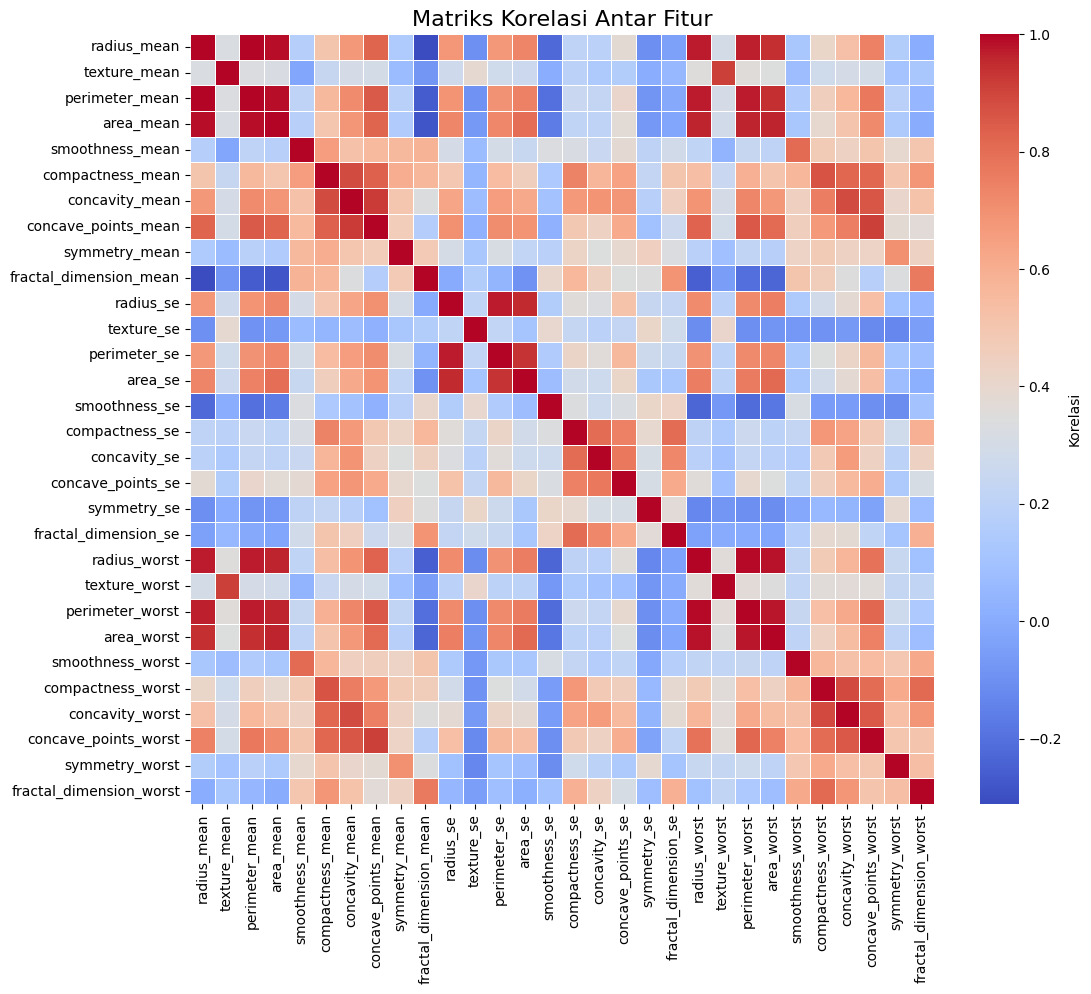

In [752]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.iloc[:, 2:].corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5, cbar_kws={'label': 'Korelasi'})

    # "🔵 Biru Gelap: Korelasi Negatif Tinggi (-1.0)\n"
    # "🔵 Biru Muda: Korelasi Negatif Sedang (-0.5 hingga -0.9)\n"
    # "⚪ Putih: Korelasi Netral (0.0)\n"
    # "🔴 Merah Muda: Korelasi Positif Sedang (0.5 hingga 0.9)\n"
    # "🔴 Merah Gelap: Korelasi Positif Tinggi (1.0)"
    
plt.title('Matriks Korelasi Antar Fitur', fontsize=16)
plt.show()

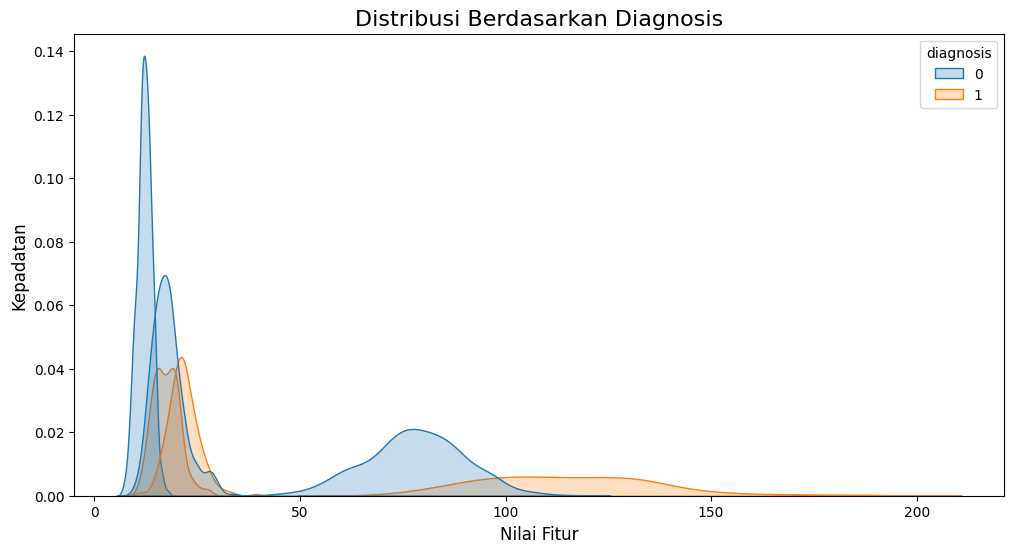

In [753]:
plt.figure(figsize=(12, 6))
for col in ['radius_mean', 'texture_mean', 'perimeter_mean']:  # Pilih beberapa fitur utama
    sns.kdeplot(data=df, x=col, hue='diagnosis', fill=True)
plt.title('Distribusi Berdasarkan Diagnosis', fontsize=16)
plt.xlabel('Nilai Fitur', fontsize=12)
plt.ylabel('Kepadatan', fontsize=12)
plt.show()


### LOGISTIC REGRESSION

In [754]:
y = df['diagnosis']
X= df.drop(columns=['diagnosis'], axis=1)

print(y)
print(X)

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64
           id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302        17.99         10.38          122.80     1001.0   
1      842517        20.57         17.77          132.90     1326.0   
2    84300903        19.69         21.25          130.00     1203.0   
3    84348301        11.42         20.38           77.58      386.1   
4    84358402        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564    926424        21.56         22.39          142.00     1479.0   
565    926682        20.13         28.25          131.20     1261.0   
566    926954        16.60         28.08          108.30      858.1   
567    927241        20.60         29.33          140.10     1265.0   
568     92751         7.76         24.54           47.92      181.0   

     

In [755]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [756]:
param_grid = {'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]}

In [757]:
log_reg_tuned = LogisticRegression()
grid_search = GridSearchCV(estimator=log_reg_tuned, param_grid=param_grid, cv=5)

In [758]:
grid_search.fit(X_train, y_train)

C:\Users\ridho\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ridho\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]})

In [759]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'C': 1}
Best Score: 0.9164835164835164


In [760]:
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

In [761]:
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print("Tuned Model Accuracy:", accuracy_tuned)

Tuned Model Accuracy: 0.9122807017543859


In [762]:
intercept_tuned = best_model.intercept_[0]
coefficients_tuned = best_model.coef_[0]

print("Tuned Model Intercept:", intercept_tuned)
print("Tuned Model Coefficients:", coefficients_tuned)

Tuned Model Intercept: -0.0004469804477584559
Tuned Model Coefficients: [ 3.62021388e-10 -3.69797442e-03 -6.52679039e-03 -2.26256560e-02
 -3.71981916e-02 -3.71605535e-05 -1.13304087e-05  2.00912176e-05
  1.01765100e-05 -7.02226272e-05 -2.76758814e-05 -8.52064057e-06
 -5.24518190e-04 -3.73663050e-05  8.60649586e-03 -3.23839770e-06
 -5.03630869e-06 -5.63457814e-06 -2.35198972e-06 -8.97208925e-06
 -1.29246867e-06 -3.42051920e-03 -8.25156052e-03 -2.07530152e-02
  3.45358659e-02 -4.81486192e-05 -1.23826759e-05  2.52619931e-05
  4.12017363e-06 -1.01251388e-04 -3.05997442e-05]


In [763]:
# Identify highly correlated features
corr_matrix = X_train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop highly correlated features
X_train_dropped = X_train.drop(columns=to_drop)
X_test_dropped = X_test.drop(columns=to_drop)

In [764]:
# Add constant to the new dataset
X_const_tuned = sm.add_constant(X_train_dropped)
logit_model = sm.Logit(y_train, X_const_tuned)
result = logit_model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.038173
         Iterations 25
const                      0.020146
id                         0.664989
radius_mean                0.217023
texture_mean               0.980507
smoothness_mean            0.224809
compactness_mean           0.290540
concavity_mean             0.066794
concave_points_mean        0.761514
symmetry_mean              0.150274
fractal_dimension_mean     0.832323
radius_se                  0.007027
texture_se                 0.128921
smoothness_se              0.256326
compactness_se             0.052136
concavity_se               0.030655
concave_points_se          0.185008
symmetry_se                0.110965
fractal_dimension_se       0.009038
texture_worst              0.048695
smoothness_worst           0.453409
compactness_worst          0.126133
concavity_worst            0.346761
concave_points_worst       0.535475
symmetry_worst             0.032609
fractal_dimension_worst    0.0112

In [765]:
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
print("Tuned Model Confusion Matrix:\n", conf_matrix_tuned)

Tuned Model Confusion Matrix:
 [[61  5]
 [ 5 43]]


In [766]:
print("Classification Report (After Tuning):")
print(classification_report(y_test, y_pred_tuned))

Classification Report (After Tuning):
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        66
           1       0.90      0.90      0.90        48

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



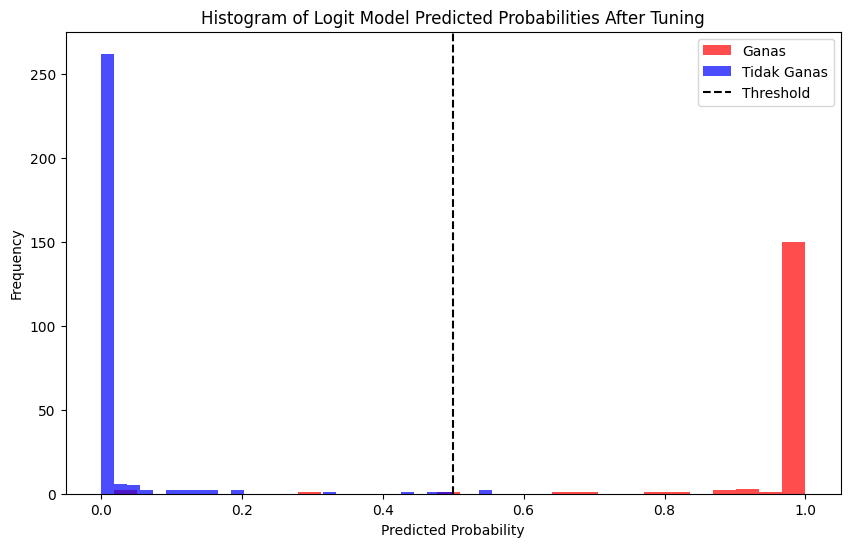

In [767]:
# Predict probabilities
y_pred_prob = result.predict(X_const_tuned )

# Define threshold for classification
threshold = 0.5

# Plot the predicted probabilities as a histogram
plt.figure(figsize=(10, 6))
plt.hist(y_pred_prob[y_train == 1], bins=30, alpha=0.7, label='Ganas', color='red')
plt.hist(y_pred_prob[y_train == 0], bins=30, alpha=0.7, label='Tidak Ganas', color='blue')
plt.axvline(threshold, color='black', linestyle='--', label='Threshold')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Histogram of Logit Model Predicted Probabilities After Tuning')
plt.legend()
plt.show()


### K-Means Clustering

In [768]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [769]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [770]:
aggregated_df = df.groupby('id').agg(
    radius_mean = ('radius_mean', 'mean'),
    texture_mean = ('texture_mean', 'mean'),
    perimeter_mean = ('perimeter_mean', 'mean'),
    area_mean = ('area_mean', 'mean'),
    smoothness_mean = ('smoothness_mean', 'mean'),
    compactness_mean = ('compactness_mean', 'mean'),
    concavity_mean = ('concavity_mean', 'mean'),
    concave_points_mean = ('concave_points_mean', 'mean'),
    symmetry_mean = ('symmetry_mean', 'mean'),
    fractal_dimension_mean = ('fractal_dimension_mean', 'mean'),
    radius_worst = ('radius_worst', 'max'),
    texture_worst = ('texture_worst', 'max'),
    perimeter_worst = ('perimeter_worst', 'max'),
    area_worst = ('area_worst', 'max'),
    smoothness_worst = ('smoothness_worst', 'max'),
    compactness_worst = ('compactness_worst', 'max'),
    concavity_worst = ('concavity_worst', 'max'),
    concave_points_worst = ('concave_points_worst', 'max'),
    symmetry_worst = ('symmetry_worst', 'max'),
    fractal_dimension_worst = ('fractal_dimension_worst', 'max')
).reset_index()

print(aggregated_df.head())

      id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0   8670        15.46         19.48          101.70      748.9   
1   8913        12.89         13.12           81.89      515.9   
2   8915        14.96         19.10           97.03      687.3   
3   9047        12.94         16.17           83.18      507.6   
4  85715        13.17         18.66           85.98      534.6   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.10920           0.12230         0.14660              0.08087   
1          0.06955           0.03729         0.02260              0.01171   
2          0.08992           0.09823         0.05940              0.04819   
3          0.09879           0.08836         0.03296              0.02390   
4          0.11580           0.12310         0.12260              0.07340   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.1931  ...         19.26          26.00           124.90  

In [771]:
print(aggregated_df.shape)

(569, 21)


In [772]:
print(aggregated_df.dtypes)

id                           int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave_points_worst       float64
symmetry_worst             float64
fractal_dimension_worst    float64
dtype: object


In [773]:
print(aggregated_df.isnull().sum())

id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [774]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [775]:
max_k = min(14, len(aggregated_df))  # Tidak lebih besar dari jumlah sampel
inertia = []

for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(aggregated_df)
    inertia.append(kmeans.inertia_)


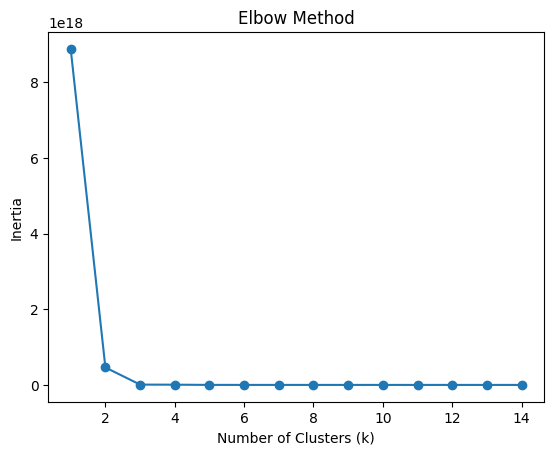

In [776]:
plt.plot(range(1, max_k + 1), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [777]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(aggregated_df)

KMeans(n_clusters=2, random_state=42)

In [778]:
aggregated_df['cluster'] = kmeans.labels_
print(aggregated_df.head())

      id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0   8670        15.46         19.48          101.70      748.9   
1   8913        12.89         13.12           81.89      515.9   
2   8915        14.96         19.10           97.03      687.3   
3   9047        12.94         16.17           83.18      507.6   
4  85715        13.17         18.66           85.98      534.6   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.10920           0.12230         0.14660              0.08087   
1          0.06955           0.03729         0.02260              0.01171   
2          0.08992           0.09823         0.05940              0.04819   
3          0.09879           0.08836         0.03296              0.02390   
4          0.11580           0.12310         0.12260              0.07340   

   symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
0         0.1931  ...          26.00           124.90      1156.0   
1 

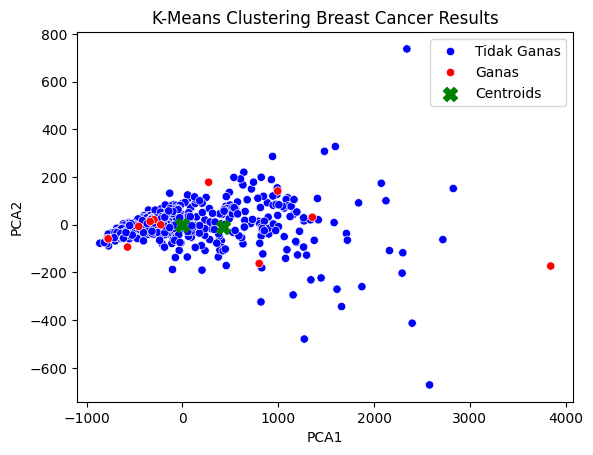

In [779]:
# PCA untuk mengurangi dimensi menjadi 2D untuk visualisasi
pca = PCA(n_components=2)
pca_components = pca.fit_transform(aggregated_df.drop(columns=['id', 'cluster']))

# Membuat DataFrame dengan komponen PCA dan label cluster
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = aggregated_df['cluster'].replace({0: 'Tidak Ganas', 1: 'Ganas'})

# Menghitung centroid untuk setiap cluster
centroids = pca_df.groupby('Cluster').mean()

# Visualisasi hasil clustering dalam 2D
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette={'Tidak Ganas': 'blue', 'Ganas': 'red'})
plt.scatter(centroids['PCA1'], centroids['PCA2'], s=100, c='green', label='Centroids', marker='X')
plt.title('K-Means Clustering Breast Cancer Results')
plt.legend()
plt.show()

In [780]:
predictions = kmeans.predict(aggregated_df.drop(columns=['cluster']))
print(predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

### DEPLOYMENT

In [781]:
# Add ngrok authtoken
!ngrok config add-authtoken 2phH5FmVt00a1lmbuntuG2iqiJL_4ShoenZC1B1SnpoCH7JTC

In [782]:
%%writefile Tubes.py

import streamlit as st
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pickle
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load data
df = pd.read_csv('BC.csv')

# Preprocessing
duplicate = df.duplicated().sum()
null_values = df.isnull().sum()

# Split data
y = df['diagnosis']
X = df[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Logistic Regression
param_grid = {'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]}
log_reg_tuned = LogisticRegression()
grid_search = GridSearchCV(estimator=log_reg_tuned, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)

# Identify highly correlated features
corr_matrix = X_train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop highly correlated features
X_train_dropped = X_train.drop(columns=to_drop)
X_test_dropped = X_test.drop(columns=to_drop)

# Add constant to the new dataset
X_const_tuned = sm.add_constant(X_train_dropped)
logit_model = sm.Logit(y_train, X_const_tuned)
result = logit_model.fit()

conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
class_report = classification_report(y_test, y_pred_tuned, output_dict=True)
y_pred_prob = result.predict(X_const_tuned )

# K-Means Clustering
aggregated_df = df.groupby('id').agg(
    radius_mean = ('radius_mean', 'mean'),
    texture_mean = ('texture_mean', 'mean'),
    perimeter_mean = ('perimeter_mean', 'mean'),
    area_mean = ('area_mean', 'mean'),
    smoothness_mean = ('smoothness_mean', 'mean'),
    compactness_mean = ('compactness_mean', 'mean'),
    concavity_mean = ('concavity_mean', 'mean'),
    concave_points_mean = ('concave_points_mean', 'mean'),
    symmetry_mean = ('symmetry_mean', 'mean'),
    fractal_dimension_mean = ('fractal_dimension_mean', 'mean'),
    radius_worst = ('radius_worst', 'max'),
    texture_worst = ('texture_worst', 'max'),
    perimeter_worst = ('perimeter_worst', 'max'),
    area_worst = ('area_worst', 'max'),
    smoothness_worst = ('smoothness_worst', 'max'),
    compactness_worst = ('compactness_worst', 'max'),
    concavity_worst = ('concavity_worst', 'max'),
    concave_points_worst = ('concave_points_worst', 'max'),
    symmetry_worst = ('symmetry_worst', 'max'),
    fractal_dimension_worst = ('fractal_dimension_worst', 'max')
).reset_index()

max_k = min(14, len(aggregated_df))
inertia = []
for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(aggregated_df)
    inertia.append(kmeans.inertia_)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(aggregated_df)
aggregated_df['cluster'] = kmeans.labels_

# PCA for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(aggregated_df.drop(columns=['id', 'cluster']))
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = aggregated_df['cluster'].replace({0: 'Tidak Ganas', 1: 'Ganas'})
centroids = pca_df.groupby('Cluster').mean()

# Streamlit Sidebar
st.sidebar.title("Segmentasi Analisis")
option = st.sidebar.radio("Pilih Analisis:", [
    "Preprocessing Data", 
    "Distribusi Data", 
    "Logistic Regression", 
    "K-Means Clustering", 
    "Prediksi Diagnosa"])

# Streamlit Dashboard
if option == "Preprocessing Data":
    st.title("Data Preprocessing")
    st.write(f"Jumlah data yang duplikat: {duplicate}")
    st.write("Jumlah data null: ", null_values)

elif option == "Distribusi Data":
    st.title("Distribusi Data")
    
    # Distribusi Diagnosis
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x='diagnosis', palette='Set2')
    plt.title('Distribusi Diagnosis', fontsize=16)
    plt.xlabel('Diagnosis (0: Tidak Berisiko, 1: Berisiko)', fontsize=12)
    plt.ylabel('Jumlah', fontsize=12)
    st.pyplot(plt)
    st.write("Distribusi Diagnosis:", df['diagnosis'].value_counts())

    # Matriks Korelasi Antar Fitur
    plt.figure(figsize=(12, 10))
    correlation_matrix = df.iloc[:, 2:].corr()
    sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5, cbar_kws={'label': 'Korelasi'})
    plt.title('Matriks Korelasi Antar Fitur', fontsize=16)
    st.pyplot(plt)

    # Distribusi Berdasarkan Diagnosis
    plt.figure(figsize=(12, 6))
    for col in ['radius_mean', 'texture_mean', 'perimeter_mean']:  # Pilih beberapa fitur utama
        sns.kdeplot(data=df, x=col, hue='diagnosis', fill=True)
    plt.title('Distribusi Berdasarkan Diagnosis', fontsize=16)
    plt.xlabel('Nilai Fitur', fontsize=12)
    plt.ylabel('Kepadatan', fontsize=12)
    st.pyplot(plt)


elif option == "Logistic Regression":
    st.title("Logistic Regression Model")
    st.write("Best Parameters:", grid_search.best_params_)
    st.write("Best Score:", grid_search.best_score_)
    st.write("Tuned Model Accuracy:", accuracy_tuned)
    st.write("Confusion Matrix:", conf_matrix_tuned)
    
    st.write("Classification Report (After Tuning):")
    st.dataframe(class_report)
    
    # Plotting the prediction probabilities
    st.write("Prediction Probabilities:")
    plt.figure(figsize=(10, 6))
    sns.histplot(y_pred_prob, bins=10, kde=True)
    plt.title('Logistic Regression Prediction Probabilities')
    plt.xlabel('Probability')
    plt.ylabel('Frequency')
    st.pyplot(plt)

    # # Plotting the histogram of predicted probabilities
    # st.write("Histogram of Predicted Probabilities:")
    # plt.figure(figsize=(10, 6))
    # plt.hist(y_pred_prob[y_test == 1], bins=30, alpha=0.7, label='Ganas', color='red')
    # plt.hist(y_pred_prob[y_test == 0], bins=30, alpha=0.7, label='Tidak Ganas', color='blue')
    # plt.axvline(0.5, color='black', linestyle='--', label='Threshold')
    # plt.xlabel('Predicted Probability')
    # plt.ylabel('Frequency')
    # plt.title('Histogram of Logit Model Predicted Probabilities After Tuning')
    # plt.legend()
    # st.pyplot(plt)

elif option == "K-Means Clustering":
    st.title("K-Means Clustering")
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_k + 1), inertia, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    st.pyplot(plt)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette={'Tidak Ganas': 'blue', 'Ganas': 'red'})
    plt.scatter(centroids['PCA1'], centroids['PCA2'], s=100, c='green', label='Centroids', marker='X')
    plt.title('K-Means Clustering Breast Cancer Results')
    plt.legend()
    st.pyplot(plt)

elif option == "Prediksi Diagnosa":
    st.title("Prediksi Diagnosa")
    st.write("Masukkan Data Pasien:")

    # Input form
    input_data = {}
    for column in X.columns:
        input_data[column] = st.number_input(f"{column}", value=0.0)

    # Predict button
    if st.button("Prediksi"):
        input_df = pd.DataFrame([input_data])
        prediction = best_model.predict(input_df)[0]
        result = "Ganas" if prediction == 1 else "Tidak Ganas"
        st.write(f"Hasil Prediksi: {result}")

# Save models
with open('modelLog.pkl', 'wb') as f:
    pickle.dump(best_model, f)
    
with open('kmeans_model.pkl', 'wb') as f_kmeans:
    pickle.dump(kmeans, f_kmeans)


Overwriting Tubes.py


In [783]:
# import pickle

# with open('modelLog.pkl', 'rb') as f: 
#     loaded_model = pickle.load(f)

#     with open('modelLog.pkl', 'rb') as f: 
#         kmeans = pickle.load(f)

In [784]:
# import pickle

# with open('modelLog.pkl', 'wb') as f:
#     pickle.dump(best_model, f)
#     # Save the KMeans model as well
#     with open('kmeans_model.pkl', 'wb') as f_kmeans:
#         pickle.dump(kmeans, f_kmeans)

In [785]:
# from pyngrok import ngrok
# import threading
# import os

# def run_streamlit():
#     os.system("streamlit run app.py --server.port 8501")

# # Stop any existing tunnels
# ngrok.kill()

# thread = threading.Thread(target=run_streamlit)
# thread.start()

# public_url = ngrok.connect(addr="8501")
# print(f"Streamlit app is live at: {public_url}")

In [786]:
# y_pred = log_regressor.predict(X_test)

# log_regressor = LogisticRegression()
# log_regressor.fit(X_train, y_train)

# intercept = log_regressor.intercept_
# coef = log_regressor.coef_

# print("Intercept : ", intercept)
# print("Koefisien : ", coef)

# # Identify highly correlated features
# corr_matrix = X_train.corr().abs()
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# # Drop highly correlated features
# X_train_dropped = X_train.drop(columns=to_drop)
# X_test_dropped = X_test.drop(columns=to_drop)

# # Add constant to the new dataset
# x_const = sm.add_constant(X_train_dropped)
# logit_model = sm.Logit(y_train, x_const)
# result = logit_model.fit()

# # Predict probabilities
# y_pred_prob = result.predict(x_const)

# # Define threshold for classification
# threshold = 0.5

# # Plot the predicted probabilities as a histogram
# plt.figure(figsize=(10, 6))
# plt.hist(y_pred_prob[y_train == 1], bins=30, alpha=0.7, label='Ganas', color='red')
# plt.hist(y_pred_prob[y_train == 0], bins=30, alpha=0.7, label='Tidak Ganas', color='blue')
# plt.axvline(threshold, color='black', linestyle='--', label='Threshold')
# plt.xlabel('Predicted Probability')
# plt.ylabel('Frequency')
# plt.title('Histogram of Logit Model Predicted Probabilities Before Tuning')
# plt.legend()
# plt.show()

# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# conf_matrix = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:\n", conf_matrix)

# print(classification_report(y_test, y_pred))

# print("Classification Report (Before Tuning):")
# print(classification_report(y_test, y_pred))